# Chapter 3: Introduction to Neural Networks


The most successful new development in the field of machine learning is neural networks. Hinton, Osindero, and Teh (2006) demonstrate how to train a deep neural network capable of recognizing handwritten digits with high accuracy. Training a deep neural network was considered impossible and most researchers had abandoned the idea since the 1990s. Now it’s the most powerful tool in the field of Machine Learning.

This chapter uses a very simple example to show you how a neural network makes predictions and learns from data. 

Suppose that you have ten pairs of 𝑋s and 𝑌s, and their values are:
* When $X=-40$, $Y=-40$
* When $X=-30$, $Y=-22$
* When $X=-10$, $Y=14$
* When $X=0$, $Y=32$
* When $X=5$, $Y=41$
* When $X=10$, $Y=50$
* When $X=20$, $Y=68$
* When $X=40$, $Y=104$
* When $X=60$, $Y=140$
* When $X=100$, $Y=212$

You may have noticed a linear relation between 𝑋 and 𝑌 that corresponds to the relation between Celsius and Fahrenheit 𝑌=1.8∗𝑋+32.
 
In this chapter, you'll animate exactly how the neural network "initializes, adjusts, and repeats." 
The model initializes parameters w and b in 𝑌=w𝑋+b; it makes predictions and adjusts w and b step by step. As the training progresses, the model will gradually find the correct relation 𝑌=1.8∗𝑋+32, as in the animation below:<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/nn.gif" />

***
$\mathbf{\text{Create a subfolder for files in Chapter 3}}$<br>
***
We'll put all files in Chapter 3 in a subfolder /files/ch03. The code in the cell below will create the subfolder.

***

In [1]:
import os

os.makedirs("files/ch03", exist_ok=True)

## 1. Anatomy of A Neural Network
Despite its widespread use, many people complain that neural networks are like black boxes and hard to understand. Indeed, nowadays, when building a neural network, you can simply use existing methods in the ***TensorFlow*** library without fully understanding what’s going on within the model. 


To look under the hood and have a better understanding of the logic behind a neural network, let’s create one from scratch and dissect its components. 


The neural network is trying to mimic human brains, which consists of billions of neurons that are connected by synapses. Neural networks try to model this process by creating a machine learning model on a computer, which consists of an input layer, an output layer, and some hidden layers in between. The powerful neural networks usually have many hidden layers, hence the name “Deep neural networks.”
We’ll start with a shallow one with no hidden layers, just one input layer with and one output layer. 


### 1.1. Elements of A Neural Network
The problem we’re trying to solve is as follows. Suppose you have ten pairs of Xs and Ys, and their values are as follows:
* When $X=-40$, $Y=-40$
* When $X=-30$, $Y=-22$
* When $X=-10$, $Y=14$
* When $X=0$, $Y=32$
* When $X=5$, $Y=41$
* When $X=10$, $Y=50$
* When $X=20$, $Y=68$
* When $X=40$, $Y=104$
* When $X=60$, $Y=140$
* When $X=100$, $Y=212$

You may have noticed a linear relationship between the values of X and Y that corresponds to the relation between Celsius and Fahrenheit
$$Y=1.8*X+32$$
The question is: if you feed the pairs of values into a machine learning model, can it learn the relationship between the two variables? After training the model, what's the model's prediction when the input value is $X=50$?


A neural network is a type of machine learning model. It tries to mimic how human brain works in solving complex problems. A neural network consists of an *input layer*, an *output layer*, and in most cases, one or more *hidden layers*. Each layer has one or more *neurons*. A neuron in one layer is connected to neurons in other layers. The diagram below shows a very simple neural networks with just one input layer and one output layer, with no hidden layers. There are two neurons in the input layer, and one neuron in the output layer. 

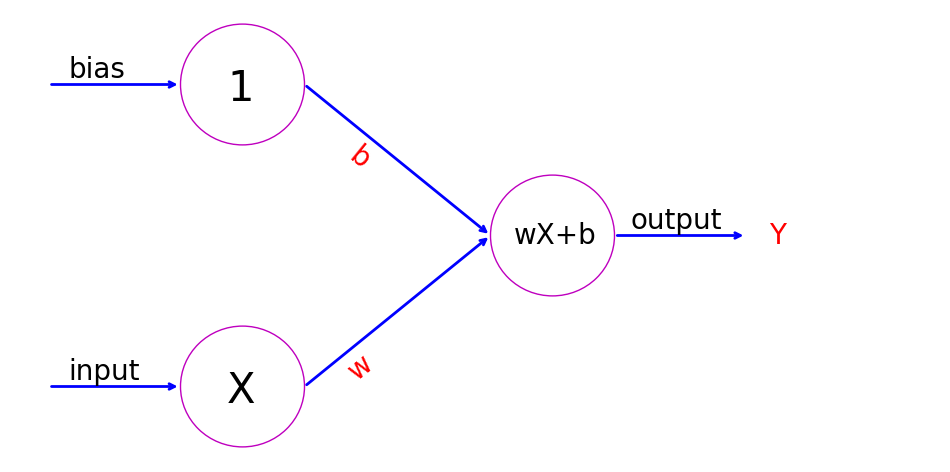

In [1]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,6), dpi=100)
ax = fig.add_subplot(111)

# Draw the two input neurons
circle = plt.Circle((-3,2),radius=0.8, color='white',ec="m")
ax.add_artist(circle)
circle = plt.Circle((-3,-2),radius=0.8, color='white',ec="m")
ax.add_artist(circle)
# Draw the output neuron
circle = plt.Circle((1,0),radius=0.8, color='white',ec="m")
ax.add_artist(circle)

# Draw connections between neurons
ax.annotate("",xy = (0.2,0), 
                   xytext = (-2.2,2), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.annotate("",xy = (0.2,0), 
                   xytext = (-2.2,-2), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.annotate("",xy = (-3.8,-2), 
                   xytext = (-5.5,-2), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.annotate("",xy = (-3.8,2), 
                   xytext = (-5.5,2), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.annotate("",xy = (3.5,0), 
                   xytext = (1.8,0), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))

# Put explanation texts on the graph
plt.text(-5.25, 2.1, "bias", fontsize=20, color="k")
plt.text(-5.25, -1.9, "input", fontsize=20, color="k")
plt.text(2, 0.1, "output", fontsize=20, color="k")
plt.text(-1.7, -1.9, f"w", fontsize=20, 
         color="r",rotation=39)
plt.text(-1.7, 0.9, f"b", fontsize=20,
         color="r",rotation=-39)
plt.text(-3.2, 1.8, "1", fontsize=30, color="k")
plt.text(-3.2, -2.2, "X", fontsize=30, color="k")
plt.text(0.5, -0.1, "wX+b", fontsize=20, color="k")
plt.text(3.8, -0.1, f"Y", fontsize=20, color="r")

ax.set_xlim(-6, 6)
ax.set_ylim(-3, 3)
plt.axis("off")
plt.savefig(f"files/ch03/nn.png")

We'll use this simple neural network to solve the problem of figuring the relation between Xs and Ys in the example above, based on the ten pairs of values. But how? Let's find out. 

### 1.2. How Does A Neural Network Learn?
A neural network takes in data inputs and generates output. In the example above, it takes in the value of X through one neuron. It also takes in a bias term (that is, a constant value of 1) through the other neuron in the input layer. Both neurons in the input layer are connected to the output neuron. 

In this simple example, the neural network consists of the input data (X and the constant 1), a weight w, a bias b, and an output $\hat{Y}$. The model generates the output Y using the following formula: $$\hat{Y}=w*X+b$$

To solve the problem in the above example, the neural network model follows the steps below:
1.	Randomly assigns a value to the weight w and a value to the bias term b;
2.	Takes the input data Xs and generates predictions for Y based on the formula $\hat{Y}=w*X+b$;   
3.	Compares the predicted Y with the actual Y and calculates the loss based on the loss function (more on this later);
4.	Calculates the gradient at the current values;
5.  Adjusts the parameters w and b based on gradient descent algorithm (or a variant of it) that we discussed in Chapter 2;
6.  Repeats Steps 2 to 5 above for many iterations. 

After the above steps, the model is considered trained. To make a prediction using the trained model for any value of X, simply use the values of w and b in the trained model, and the prediction is $\hat{Y}=w*X+b$. 

***
$\mathbf{\text{What is a loss function?}}$<br>
***
The loss function is a measure on how good the prediction is. In many cases, we use the mean squared error (MSE), which is defined as $$MSE= \frac{1}{N} \sum_{i=1} ^{N} (Y_n-\hat{Y}_n)^2$$
***

***
$\mathbf{\text{How to implement gradient descent in this example?}}$<br>
***
Training the neural network in this case boils down to finding the values of w and b that minimize the loss function $MSE= \frac{1}{N} \sum_{i=1} ^{N} (Y_n-\hat{Y}_n)^2$. Based on the skills we learned in Chapter 2, we can implement this explicitly by using the gradient descent algorithm. In particular, we can calculate the gradient of the loss function at any given point as follows. 

The loss function is:
$$\mathbf{L}(w,b)= MSE = \frac{1}{N} \sum_{i=1} ^{N} (Y_n-\hat{Y}_n)^2 = \frac{1}{N} \sum_{i=1} ^{N} (Y_n-b-w*X_n)^2$$

Therefore, the gradients are:
$$\frac{\partial \mathbf{L}(w,b)}{\partial w}= \frac{1}{N} \sum_{i=1} ^{N} -2X_n(Y_n-b-w*X_n)$$
and 
$$\frac{\partial \mathbf{L}(w,b)}{\partial b}= \frac{1}{N} \sum_{i=1} ^{N} -2(Y_n-b-w*X_n)$$
***

We'll modify the code we used in Chapter 2 and apply a similar algorithm of gradient descent to find out what's the values of w and b that minimize the loss function. We'll then use the trained model to make predictions. 

In [6]:
import numpy as np

# the values of X and Y
X=np.array([-40, -30, -10, 0, 5, 10, 20, 40, 60, 100]).reshape(-1,1)
Y=np.array([-40.0, -22.0, 14.0, 32.0, 41.0, 50.0, 68.0, 104.0, 140.0, 212.0]).reshape(-1,1)

# create a vector of ones for later use
const = np.tile(1,[len(X),1])

# randomly assign values to w and b
w = 1
b = 1
# reshape to matrix form for matrix multiplication
w = np.array([w]).reshape(1,1)
b = np.array([b]).reshape(1,1)

print(f"the initial weights are w={w[0,0]} and b={b[0,0]}")
# set the learning rate
lr=0.0005

# record results
ws, bs, yhats, losses = [], [], [], []
# train the model
for i in range(8000):
    # make predictions
    pred=np.matmul(X, w) + b
    # calculate loss as MSE
    loss=(Y-pred).T@(Y-pred)/len(Y)
    # calculate gradients
    dldw=-2*X.T@(Y-pred)/len(X)
    dldb=-2*const.T@(Y-pred)/len(X)
    # perform gradient descent
    w = w - lr*dldw
    b = b - lr*dldb
    if (i+1)%100==0:
        print(f"interation: {i+1}, loss: {loss[0,0]}, weights: w={w[0,0]} b={b[0,0]}")
        ws.append(w[0,0])
        bs.append(b[0,0])
        yhats.append(pred)
        losses.append(loss[0,0])

the initial weights are w=1 and b=1
interation: 100, loss: 702.5788941091446, weights: w=2.040425243055281 b=3.589007086046493
interation: 200, loss: 590.4681024777344, weights: w=2.020409726826585 b=5.954237082720139
interation: 300, loss: 496.2468741474807, weights: w=2.002060501968179 b=8.122560446933235
interation: 400, loss: 417.06056443655496, weights: w=1.985238859661378 b=10.110369758756137
interation: 500, loss: 350.5100454425115, weights: w=1.9698176278610424 b=11.93269290731652
interation: 600, loss: 294.57901904988455, weights: w=1.9556802216612006 b=13.603306702124456
interation: 700, loss: 247.57292862987248, weights: w=1.9427197619101868 b=15.134841026103935
interation: 800, loss: 208.0676186242325, weights: w=1.930838267201523 b=16.538874317830075
interation: 900, loss: 174.86618653965132, weights: w=1.9199459131319858 b=17.82602110482023
interation: 1000, loss: 146.96272008641586, weights: w=1.9099603532268319 b=19.00601224963293
interation: 1100, loss: 123.51182079618

After 8000 epochs of training, the values of w and b converge to around 1.8 and 32, their true values. 

To make a prediction on what's the value of Y when X=50, we can use the code in the cell below

In [7]:
pred_Y = ws[-1]*50 + bs[-1]
print(f"when X=50, the prediction is Y={pred_Y}")

when X=50, the prediction is Y=121.98292444485148


The result above shows that the prediction is 121.98, very close to the true value of 122 Fahrenheit. 

The following cell creates a graph every 100 epochs:

In [2]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle


for k in range(len(ws)):
    w=round(ws[k],3)
    b=round(bs[k],1)   
    loss=round(losses[k],3)    
    yhat=yhats[k]  
    
    fig = plt.figure(figsize=(12,6), dpi=100)
    ax = fig.add_subplot(111)
    
    # add rectangle to plot
    ax.add_patch(Rectangle((2.2,-2.5), 1.5, 5,
                 edgecolor = 'k',alpha=0.1))
    ax.add_patch(Rectangle((4,-2.5), 1.7, 5,
                 edgecolor = 'k',alpha=0.1))
    # Draw the two input neurons
    circle = plt.Circle((-3,2),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    circle = plt.Circle((-3,-2),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    # Draw the output neuron
    circle = plt.Circle((1,0),radius=0.8, color='white',ec="m")
    ax.add_artist(circle)
    
    # Draw connections between neurons
    ax.annotate("",xy = (0.2,0), 
                       xytext = (-2.2,2), 
                       arrowprops=dict(arrowstyle = '->',
                       color = 'b', linewidth = 2))
    ax.annotate("",xy = (0.2,0), 
                       xytext = (-2.2,-2), 
                       arrowprops=dict(arrowstyle = '->',
                       color = 'b', linewidth = 2))
    ax.annotate("",xy = (-3.8,-2), 
                       xytext = (-5.5,-2), 
                       arrowprops=dict(arrowstyle = '->',
                       color = 'b', linewidth = 2))
    ax.annotate("",xy = (-3.8,2), 
                       xytext = (-5.5,2), 
                       arrowprops=dict(arrowstyle = '->',
                       color = 'b', linewidth = 2))
    ax.annotate("",xy = (2.2,0), 
                       xytext = (1.8,0), 
                       arrowprops=dict(arrowstyle = '->',
                       color = 'b', linewidth = 2))
    # put epoch number and losses up
    plt.text(-0.7, 2.2, f"epoch={(k+1)*100}\nloss={loss}", fontsize=20, color="g")
    
    # Put explanation texts on the graph
    plt.text(-5.25, 2.1, "bias", fontsize=20, color="k")
    plt.text(-5.25, -1.9, "input", fontsize=20, color="k")
    plt.text(2.3, 2.6, "output", fontsize=20, color="k")
    plt.text(4.3, 2.6, "loss", fontsize=20, color="k")
    plt.text(-1.7, -1.9, f"w={w}", fontsize=20, 
             color="r",rotation=39)
    plt.text(-1.7, 0.9, f"b={b}", fontsize=20,
             color="r",rotation=-39)
    plt.text(-3.2, 1.8, "1", fontsize=30, color="k")
    plt.text(-3.2, -2.2, "X", fontsize=30, color="k")
    plt.text(0.5, -0.1, "wX+b", fontsize=20, color="k")
    plt.text(2.3, -2.92, "$\hat{Y}$", fontsize=15, color="r")
    plt.text(4, -2.92, "$(\hat{Y}-Y)^2$", fontsize=15, color="r")
    
    for i in range(10):
        plt.text(4, 2.2-i*0.5, f"$({round(Y[i,0],1)}-{round(yhat[i,0],1)}"+")^2$", fontsize=10, color="k")
        plt.text(2.3, 2.2-i*0.5, f"{i+1}: "+"$\hat{Y}$"+f"={round(yhat[i,0],3)}", fontsize=10, color="k")
    
    ax.set_xlim(-6, 6)
    ax.set_ylim(-3, 3)
    plt.axis("off")
    plt.savefig(f"files/ch03/nn{k}.png")
    plt.close(fig)


For example, if you open the picture nn16.png, you'll see the following:<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/nn16.png" />

Next, we'll create an animation of the training process using the 80 pictures we generated above. 

In [3]:
import imageio, PIL
frames=[]

for k in range(len(ws)):
    frame=PIL.Image.open(f"files/ch03/nn{k}.png")
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('files/ch03/nn.gif', frames, fps=6)

You'll see the animation as follows:<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/nn.gif" />

## 2. Solving the Same Problem with Tenforflow
Now that you understand how neural networks train a model and make predictions, you'll build one with the ***tensorflow*** library so that you don't need to do as much heavy coding every time you want to use a neural network. 

First, you'll learn to use the ***tensorflow*** library to explicitly calculate the gradients each iteration and adjust the parameters based on some variants of the gradient descent algorithm. This method is useful later in this book because in certain scenarios, you need to calculate the gradients explicitly to train the model (e.g., in policy gradients Reinforcement Learning). 

Second, you'll simply use the *fit()* and *predict()* methods in the ***tensorflow*** library so that the amount of coding is minimal. This helps you to focus on other aspects of machine learning such as data processing, hyperparameter tuning and so on.

### 2.1. Calculate Gradients Explicitly
We’ll use ***tensorflow*** to calculate the gradients explicitly each iteration and adjust the parameters accordingly. 

In [8]:
import numpy as np
import tensorflow as tf

# Fix the random state so results are reproducible
tf.random.set_seed(0)

X = np.array([-40, -30, -10, 0, 5, 10, 20, 40, 60, 100], dtype=float).reshape(-1,1)
y = np.array([-40.0, -22.0, 14.0, 32.0, 41.0, 50.0, 68.0, 104.0, 140.0, 212.0],\
             dtype=float).reshape(-1,1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=[1]))
mse = tf.keras.losses.MeanSquaredError()
# the Adam optimizer is a variant of gradient descent
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)

pred = model(X)
loss=mse(y, pred)
for i in range(5000):
    with tf.GradientTape() as t:
        pred = model(X)
        loss=mse(y, pred)
    # Update using backpropagation
    gs = t.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gs,model.trainable_variables))
    
pred_y = model.predict(X) 

w, bias = model.layers[-1].get_weights()
print(f"weights are {w[0,0], bias[0]}")

pred = model.predict([[50]])
print(f"when X=50, the prediction is Y={round(pred[0,0],2)}")

C:\Users\mark\.conda\envs\animatedML\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


weights are (1.8000001, 31.999989)
when X=50, the prediction is Y=122.0


### 2.2. Use the fit() and predict() Methods Directly
You can also use the *fit()* method to train the model, and the *predict()* method to make predictions after training. This way, you can avoid too much heavy coding. 

In [9]:
import numpy as np
import tensorflow as tf

# Fix the random state so results are reproducible
tf.random.set_seed(0)

X = np.array([-40, -30, -10, 0, 5, 10, 20, 40, 60, 100], dtype=float).reshape(-1,1)
y = np.array([-40.0, -22.0, 14.0, 32.0, 41.0, 50.0, 68.0, 104.0, 140.0, 212.0], dtype=float).reshape(-1,1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=[1]))
model.compile(loss='mean_squared_error',  
              optimizer=tf.keras.optimizers.Adam(lr=0.1))
model.fit(X, y, verbose=0, epochs=5000)

w, bias = model.layers[-1].get_weights()
print(f"weights are {w[0,0], bias[0]}")

pred = model.predict([[50]])
print(f"when X=50, the prediction is Y={round(pred[0,0],2)}")

weights are (1.8000001, 31.999989)
when X=50, the prediction is Y=122.0


Here you get exactly the same answer as before, but you don't need to calculate the gradients and make adjustments explicitly.